## 🐕 WeRateDogs Twitter Project

In this project, I will analyze and investigate three datasets related to WeRateDogs on Twitter. 
One of the datasets was scraped by me, while the other two were provided.

## Data Wrangling :

### Importing Libraries :

In [1]:
!pip install tweepy

In [2]:
#Importing Libiraries :
import pandas as pd
import numpy as np
import requests
from IPython.display import display
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading First Dataset
df_archive= pd.read_csv("twitter-archive-enhanced.csv")

In [4]:
# Downloading Sec Dataset programmatically Using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', 'wb') as f:
    f.write(response.content)
    
df_image = pd.read_csv('image-predictions.tsv', sep='\t') 

In [5]:
#Third File 
tweets_data = []

f = open('tweet-json.txt', 'r')
for line in f:
        dic = {}
        tweet = json.loads(line)
        dic["retweet count"] = tweet["retweet_count"]
        dic["tweet id"] = tweet["id"]
        dic['favorite count'] = tweet['favorite_count']
        tweets_data.append(dic)
f.close()

In [6]:
df_json= pd.DataFrame(tweets_data)

In [7]:
# Dataframes
dataframes = {
    "archive" : df_archive,
    "images" : df_image,
    "json" : df_json
}

In [8]:
df_json.head()

,retweet count,tweet id,favorite count
0,8853,892420643555336193,39467
1,6514,892177421306343426,33819
2,4328,891815181378084864,25461
3,8964,891689557279858688,42908
4,9774,891327558926688256,41048


## Exploration and Assessing Data : 

In [39]:
for name ,df in dataframes.items():
    print(f'{name} Dataset Info')
    df.info()
    display(df.head())

archive Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2356 non-null   int64              
 1   timestamp      2356 non-null   datetime64[ns, UTC]
 2   source         2356 non-null   object             
 3   text           2356 non-null   object             
 4   expanded_urls  2297 non-null   object             
 5   name           1611 non-null   object             
 6   dog_stage      380 non-null    object             
 7   rating         2356 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 147.4+ KB


,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,1.2


images Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


json Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet count   2354 non-null   int64
 1   favorite count  2354 non-null   int64
 2   tweet_id        2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


,retweet count,favorite count,tweet_id
0,8853,39467,892420643555336193
1,6514,33819,892177421306343426
2,4328,25461,891815181378084864
3,8964,42908,891689557279858688
4,9774,41048,891327558926688256


In [114]:
for name,df in dataframes.items():
    print(f"{name} DataSet ")
    display(df.isnull().sum(),"\n")

archive DataSet 


tweet_id            0
timestamp           0
source              0
text                0
expanded_urls       0
name              493
dog_stage        1426
rating              0
dtype: int64

'\n'

images DataSet 


tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

'\n'

json DataSet 


retweet count     0
favorite count    0
tweet_id          0
dtype: int64

'\n'

In [115]:
for name,df in dataframes.items():
    print(f"{name} DataSet")
    display(df.sample(5))

archive DataSet


,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating
1737,679530280114372609,2015-12-23 05:13:38,"<a href=""http://twitter.com/download/iphone"" r...",Guys this really needs to stop. We've been ove...,https://twitter.com/dog_rates/status/679530280...,NaN,None,0.7
2020,672095186491711488,2015-12-02 16:49:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Tuco. That's the toast that killed his...,https://twitter.com/dog_rates/status/672095186...,Tuco,None,0.9
47,883117836046086144,2017-07-07 00:17:54,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,NaN,None,1.3
1789,677547928504967168,2015-12-17 17:56:29,"<a href=""http://twitter.com/download/iphone"" r...",Not much to say here. I just think everyone ne...,https://twitter.com/dog_rates/status/677547928...,NaN,None,1.2
1187,718460005985447936,2016-04-08 15:26:28,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bowie. He's listening for underground squ...,https://twitter.com/dog_rates/status/718460005...,Bowie,None,0.9


images DataSet


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1812,833124694597443584,https://pbs.twimg.com/media/C4_ad1IUoAEspsk.jpg,3,Cardigan,0.710523,True,kelpie,0.106102,True,shopping_cart,0.055475,False
1573,795400264262053889,https://pbs.twimg.com/media/CwnUUGTWIAE8sFR.jpg,2,golden_retriever,0.925494,True,Labrador_retriever,0.059241,True,tennis_ball,0.004495,False
1865,843235543001513987,https://pbs.twimg.com/media/C7PGQJAWwAAibui.jpg,1,Pembroke,0.958452,True,Cardigan,0.023770,True,Chihuahua,0.005269,True
1555,793195938047070209,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,2,Labrador_retriever,0.654762,True,golden_retriever,0.074100,True,Chihuahua,0.042339,True
1266,749395845976588288,https://pbs.twimg.com/media/CmZjizYW8AA3FCN.jpg,1,Pomeranian,0.973715,True,chow,0.020758,True,keeshond,0.003784,True


json DataSet


,retweet count,favorite count,tweet_id
1530,1907,4004,690005060500217858
646,2893,7214,793135492858580992
1399,577,2384,699434518667751424
2110,570,1127,670435821946826752
700,179,1614,786051337297522688


In [116]:
df_archive['dog_stage'].value_counts()

dog_stage
pupper           168
doggo             54
puppo             21
doggo/pupper       8
floofer            7
doggo/puppo        1
doggo/floofer      1
Name: count, dtype: int64

In [107]:
df_image['p1_dog'].sample(5)

583     True
449     True
360     True
2043    True
1031    True
Name: p1_dog, dtype: bool

In [9]:
#Making a Copy before Cleaning
dataframes_copy = dataframes.copy()

# Cleaning Data

### Tidiness and Quality Issues Identified
- The three datasets (`df_archive`, `df_image`, `df_json`) all contain information about the same observational unit (tweets) and need to be merged into one master dataset.
- Retweets are present and must be removed (they start with `RT @` in the `text` column).
- Dog stages are split into separate columns (doggo, floofer, pupper, puppo) instead of a single categorical column.
- Some dog names are incorrect (e.g., "a", "an", "the", or "None").

## Quality Issues :

### 1- Define: Removing some unuseful columns in "Archive" DataSet

In [13]:
df_archive.drop(['in_reply_to_status_id',
               'in_reply_to_user_id',
               'retweeted_status_id',
               'retweeted_status_user_id',
               'retweeted_status_timestamp',
               'rating_numerator',
               'rating_denominator'], inplace=True, axis=1)

### Test: Confirm Columns Are Dropped


In [14]:
#Testing
print(df_archive.columns)

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'dog_stage', 'rating'],
      dtype='object')


### 2- Define: Removing The 4 columns after I combined them into one column called dog_stage

In [15]:
df_archive.drop([
    'doggo',
    'floofer',	
    'pupper',
    'puppo'
], inplace=True, axis=1)

### Test: Confirm Columns Are Dropped

In [16]:
#Testing
print(df_archive.columns)

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'dog_stage', 'rating'],
      dtype='object')


### 3- Define: In "Archive" Dataset Converting Timestamp column to datatime

In [17]:
df_archive['timestamp'] = df_archive['timestamp'].astype('str')

In [18]:
df_archive['timestamp']=df_archive['timestamp'].str.replace("+00:00","")

In [19]:
df_archive['timestamp'] = pd.to_datetime(df_archive['timestamp'])

### Test: Check DataType Of TimeStamp

In [20]:
#Testing
df_archive.dtypes

tweet_id                       int64
timestamp        datetime64[ns, UTC]
source                        object
text                          object
expanded_urls                 object
name                          object
dog_stage                     object
rating                       float64
dtype: object

### 4- Define: There are more tweet IDs in the "Archive" dataset than in the "Image" dataset. This means some tweets in the Archive dataset don't have  image predictions.

To fix this, I removed the tweets from the Archive dataset that don't have a matching tweet ID in the Image dataset. This ensures all remaining tweets have image data.

In [21]:
df_archive = df_archive[df_archive['tweet_id'].isin(df_image['tweet_id'])]

### Test: Check Data Shape Of Archive

In [22]:
#Testing
print(df_archive.shape)

(2075, 8)


### 5- Define: Some rows in the Image dataset don't contain dogs in the predictions.

Solution:
I kept only the rows where at least one of the top three predictions is True.

In [23]:
df_image = df_image[(df_image['p1_dog']) | (df_image['p2_dog']) | (df_image['p3_dog'])]

### Test: Check Data Shape Of Archive

In [24]:
#Testing
print(df_image.shape)

(1751, 12)


### 6- Define: Removing invalid names in "Archive" DataSet

In [25]:
wrong_names = ['nan', 'Shadow', 'Meatball', 'quite', 'Pickles', 'Scooter', 'one', 'Bear', 'Pilot', 'Peaches', 'a', 'the']
df_archive['name'] = df_archive['name'].apply(lambda x: np.nan if str(x).lower() in [n.lower() for n in wrong_names] else x)

C:\Users\Eslam\AppData\Local\Temp\ipykernel_23148\479166719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_archive['name'] = df_archive['name'].apply(lambda x: np.nan if str(x).lower() in [n.lower() for n in wrong_names] else x)


### Test: Check if invalid names are removed


In [26]:
#Testing
print(df_archive['name'].sample(5))

2296     Clybe
940     Tayzie
913        NaN
1643     Sadie
1456     Colin
Name: name, dtype: object


### 7- Define: Editing the "tweet id" column in df_json to "tweet_id", so i can merge all three datasets into a master dataset.

In [27]:
df_json['tweet_id'] = df_json['tweet id']

### Test: Check If the column is added

In [28]:
#Testing
df_json.columns

Index(['retweet count', 'tweet id', 'favorite count', 'tweet_id'], dtype='object')

### 8- Define: Droping the "tweet id" column

In [29]:
df_json.drop("tweet id", inplace=True, axis=1)

### Test: Check If the column is dropped

In [30]:
#Testing
df_json.columns

Index(['retweet count', 'favorite count', 'tweet_id'], dtype='object')

### 9- Define: Remove Retweets 
We only want original ratings. Retweets (tweets that start with `RT @`) should be removed from the dataset.


In [31]:
# Remove retweets
df_archive = df_archive[~df_archive['text'].str.startswith('RT @')]

### Test: Confirm no retweets remain
Check that no tweet starts with "RT @"


In [32]:
# Test: Ensure no retweets remain
df_archive['text'].str.startswith('RT @').sum()

0

### Tidness Issues :

### 1- Define: In the "Archive" dataset, there are four separate columns — doggo, floofer, pupper, and puppo — that represent different dog stages. These are actually values of a single variable (dog stage), so this structure is not tidy.

To fix this, I created a new column named dog_stage and combined the values from all four columns into it.

In [9]:
def get_dog_stage(row):
    column = []
    if row['doggo'] == "doggo":
        column.append('doggo')
    if row['floofer'] == "floofer":
        column.append('floofer')
    if row['pupper'] == "pupper":
        column.append('pupper')
    if row['puppo'] == "puppo":
        column.append("puppo")

    # If multiple stages, join them with a slash
    return '/'.join(column) if column else None

df_archive['dog_stage'] = df_archive.apply(get_dog_stage, axis=1)

### Test: Check unique values in new dog_stage column


In [10]:
#Testing
df_archive['dog_stage'].sample(5)

1002      None
1209      None
1036      None
1382    pupper
120       None
Name: dog_stage, dtype: object

### 2- Define: In the "Archive" dataset, there are two separate columns -- rating_numerator, rating_denominator -- These must be in a single column (rating)

To fix this, I created a new column called rating by dividing rating_numerator by rating_denominator.

In [11]:
df_archive['rating'] = df_archive['rating_numerator'] / df_archive['rating_denominator']

### Test: Check If The Rating column is added

In [12]:
#Testing
df_archive['rating'].sample(5)

2131    1.0
832     1.2
982     1.0
2320    0.7
1452    1.3
Name: rating, dtype: float64

### Define: Merge Datasets
We want to create a master dataset by merging the cleaned `df_archive`, `df_image`, and `df_json` DataFrames on `tweet_id`.


In [33]:
#Merging all Three DataSets
df_merged = df_archive.merge(df_image, on='tweet_id')
tweets = df_merged.merge(df_json, on='tweet_id')

### Test: Confirm merged dataset info and shape


In [34]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1686 non-null   int64              
 1   timestamp       1686 non-null   datetime64[ns, UTC]
 2   source          1686 non-null   object             
 3   text            1686 non-null   object             
 4   expanded_urls   1686 non-null   object             
 5   name            1193 non-null   object             
 6   dog_stage       260 non-null    object             
 7   rating          1686 non-null   float64            
 8   jpg_url         1686 non-null   object             
 9   img_num         1686 non-null   int64              
 10  p1              1686 non-null   object             
 11  p1_conf         1686 non-null   float64            
 12  p1_dog          1686 non-null   bool               
 13  p2              1686 non-null   o

## Define: Write the cleaned and merged DataFrame to a CSV file


In [35]:
tweets.to_csv('twitter_archive_master.csv', index=False)

# Storing Data 

In [36]:
df_archive.to_csv('twitter_archive_master.csv', index=False)
df_image.to_csv('twitter_image_predictions.csv', index=False)
df_json.to_csv('twitter_metrics.json.csv', index=False)

# Analyzing and Visualizing Data

### Insight 1 : Most Common Dog Stage 

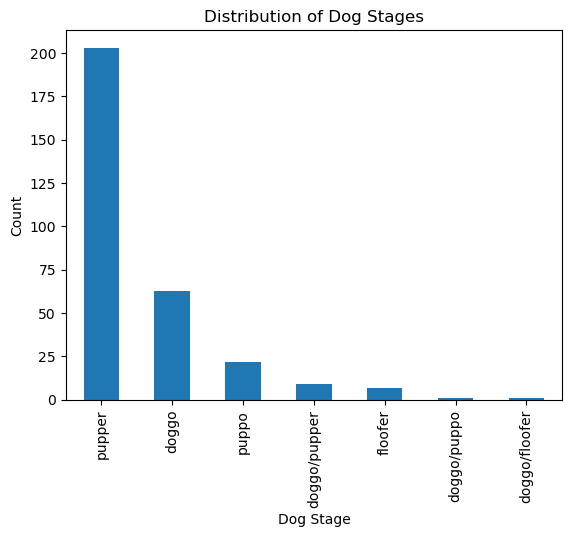

In [37]:
df_archive['dog_stage'].value_counts().plot(kind='bar', title='Distribution of Dog Stages')
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.show()

Documentation:

The cleaned dog_stage column was created by merging four original columns: doggo, floofer, pupper, and puppo. This bar chart shows the frequency of each dog stage.

### Insight 2: Relationship Between Retweets and Favorites

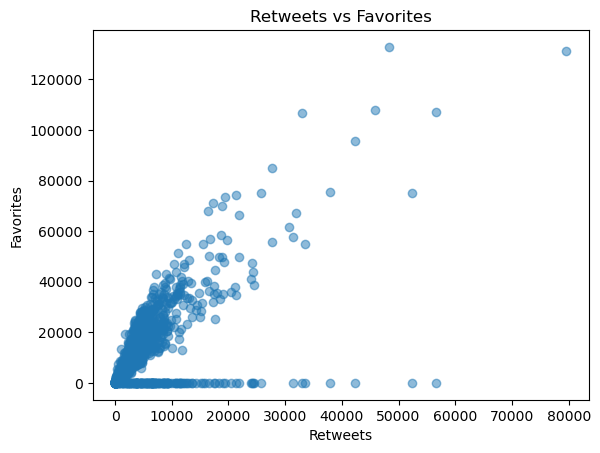

In [38]:
plt.scatter(df_json['retweet count'], df_json['favorite count'], alpha=0.5)
plt.title('Retweets vs Favorites')
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()

Documentation:

This scatter plot uses the cleaned JSON tweet data, merged into the master dataset. It shows a positive relationship between retweets and favorites.

### Insight 3: Most Common Dog Breeds

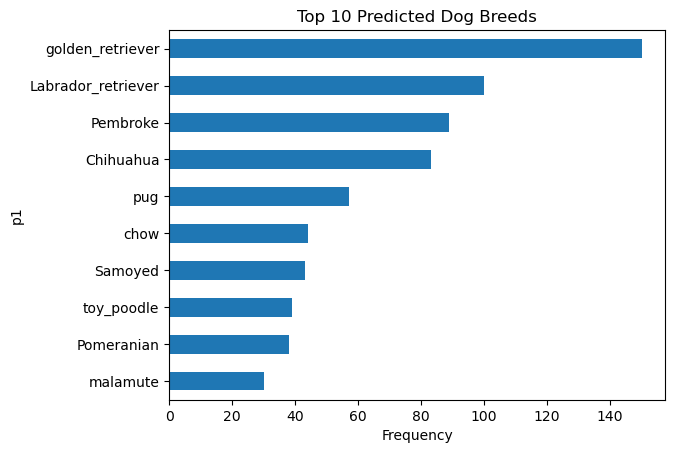

In [39]:
df_image['p1'].value_counts().head(10).plot(kind='barh', title='Top 10 Predicted Dog Breeds')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.show()

Documentation:

The plot uses the cleaned image prediction dataset. Only rows where at least one of the top 3 predictions was a dog (p1_dog, p2_dog, p3_dog) were retained.

### Insight 4- Tweets with the Most Favorites vs. Retweets

Which tweets had the most favorites vs. retweets?

🔷 Most Favorited Tweets:


,text,favorite count
278,Here's a super supportive puppo participating ...,132810
691,Here's a doggo realizing you can stand in a po...,131075
53,This is Duddles. He did an attempt. 13/10 some...,107956
363,This is Stephan. He just wants to help. 13/10 ...,107015
100,This is Jamesy. He gives a kiss to every other...,106827



🔶 Most Retweeted Tweets:


,text,retweet count
691,Here's a doggo realizing you can stand in a po...,79515
363,This is Stephan. He just wants to help. 13/10 ...,56625
719,Here's a doggo blowing bubbles. It's downright...,52360
278,Here's a super supportive puppo participating ...,48265
53,This is Duddles. He did an attempt. 13/10 some...,45849


C:\Users\Eslam\AppData\Local\Temp\ipykernel_23148\1008956998.py:36: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from current font.
  plt.tight_layout()
C:\Users\Eslam\AppData\Local\Temp\ipykernel_23148\1008956998.py:36: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from current font.
  plt.tight_layout()
C:\Users\Eslam\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Eslam\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


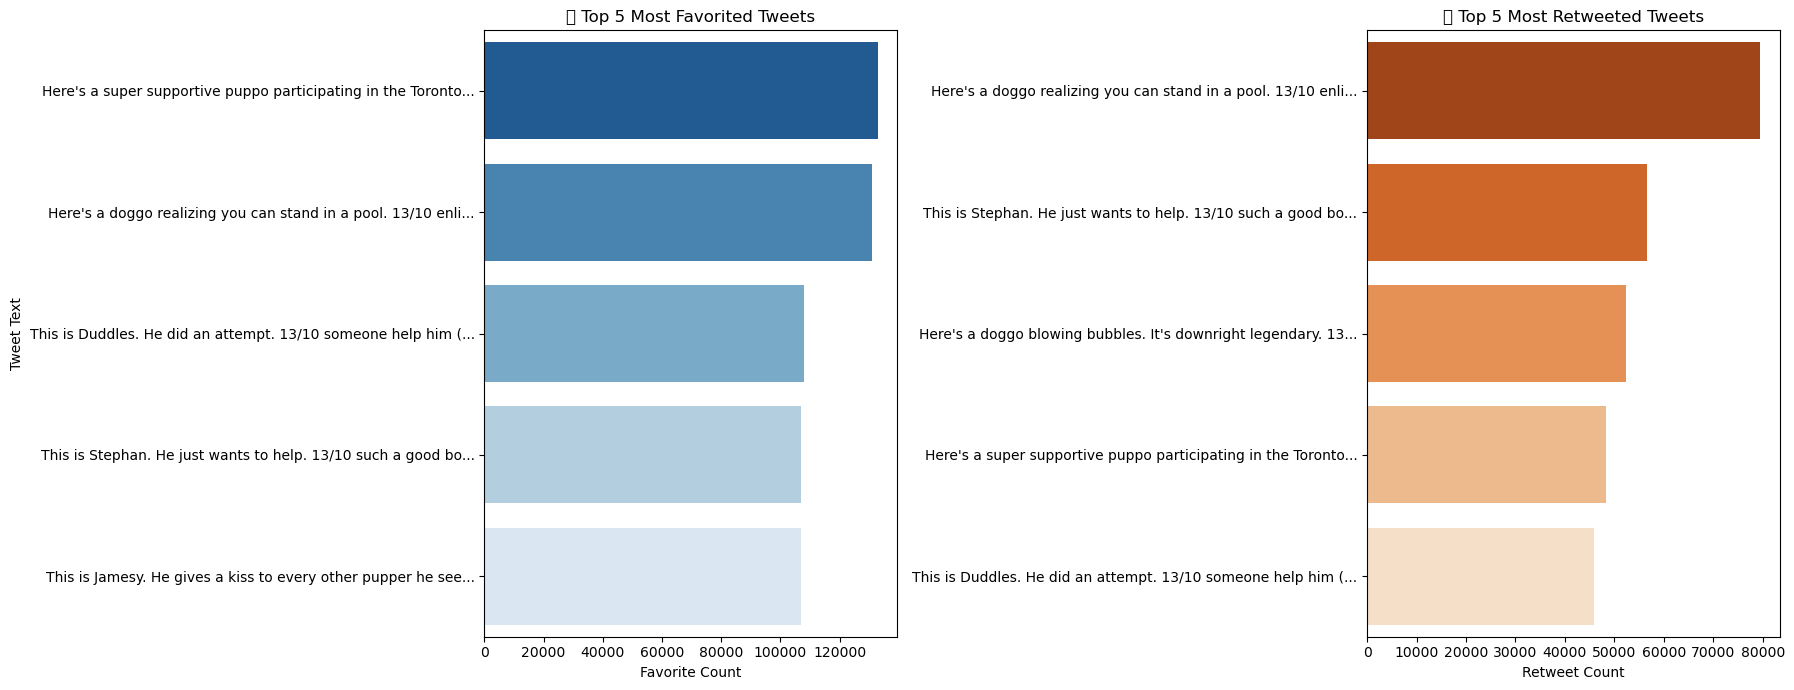

In [40]:
top_fav = tweets.sort_values(by='favorite count', ascending=False).head(5)[['tweet_id', 'text', 'favorite count']]
top_retweet = tweets.sort_values(by='retweet count', ascending=False).head(5)[['tweet_id', 'text', 'retweet count']]

print("🔷 Most Favorited Tweets:")
display(top_fav[['text', 'favorite count']])

print("\n🔶 Most Retweeted Tweets:")
display(top_retweet[['text', 'retweet count']])


# Plot : 

# Sort and select top tweets
top_fav = tweets.sort_values(by='favorite count', ascending=False).head(5)[['text', 'favorite count']]
top_retweet = tweets.sort_values(by='retweet count', ascending=False).head(5)[['text', 'retweet count']]

# Shorten tweet text for visualization
top_fav['short_text'] = top_fav['text'].str.slice(0, 60) + '...'
top_retweet['short_text'] = top_retweet['text'].str.slice(0, 60) + '...'

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Favorites
sns.barplot(data=top_fav, y='short_text', x='favorite count', ax=axes[0], palette='Blues_r')
axes[0].set_title('🔷 Top 5 Most Favorited Tweets')
axes[0].set_xlabel('Favorite Count')
axes[0].set_ylabel('Tweet Text')

# Retweets
sns.barplot(data=top_retweet, y='short_text', x='retweet count', ax=axes[1], palette='Oranges_r')
axes[1].set_title('🔶 Top 5 Most Retweeted Tweets')
axes[1].set_xlabel('Retweet Count')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

🔎 Insight: Understand what kind of content tends to get more attention via likes or shares.

### Insight 5- Time of Day vs Engagement

Are tweets at certain times getting more likes?

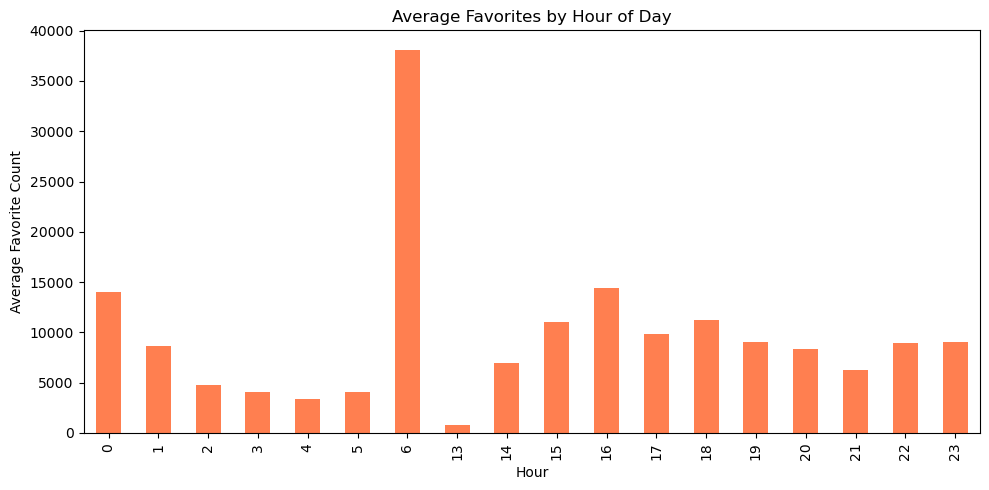

In [41]:
tweets['hour'] = tweets['timestamp'].dt.hour
avg_favs_by_hour = tweets.groupby('hour')['favorite count'].mean()

plt.figure(figsize=(10,5))
avg_favs_by_hour.plot(kind='bar', color='coral')
plt.title('Average Favorites by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Favorite Count')
plt.tight_layout()
plt.show()


🔎 Insight: Shows which posting times are best for engagement.



### Insight 6- What Days Are Dogs Posted Most? 

Analyze tweet frequency by day of the week.

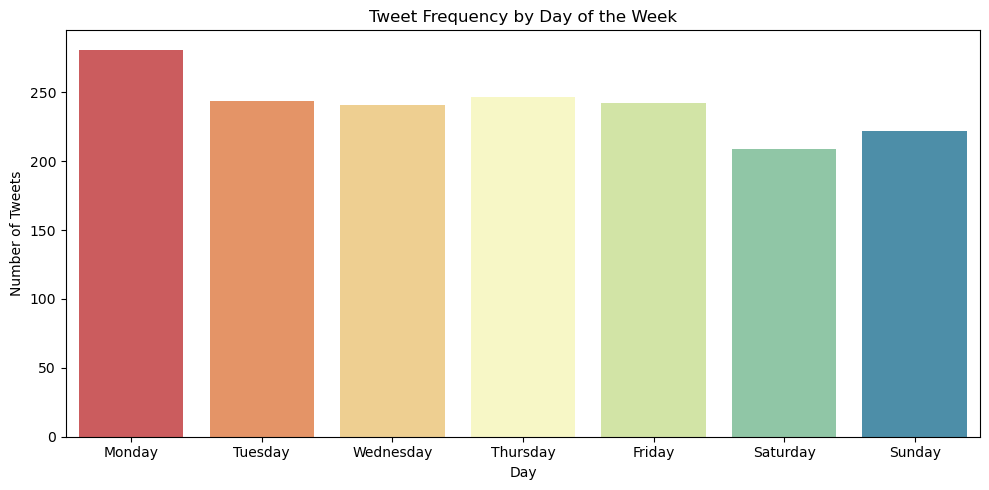

In [42]:
tweets['day_of_week'] = tweets['timestamp'].dt.day_name()

tweets_per_day = tweets['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10,5))
sns.barplot(x=tweets_per_day.index, y=tweets_per_day.values, palette='Spectral')
plt.title('Tweet Frequency by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()


🔍 Insight: See if weekends or weekdays are more active.

### Insights 7- Device Used vs Engagement

Check whether iPhone, Android, or Web tweets get more favorites.

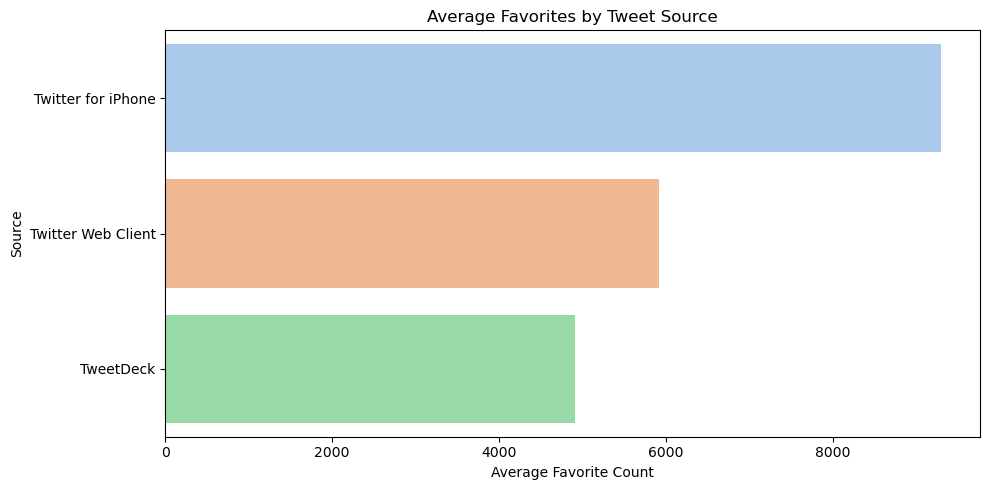

In [43]:
# Simplify sources
tweets['source_clean'] = tweets['source'].str.extract('>(.*?)<')

fav_by_source = tweets.groupby('source_clean')['favorite count'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=fav_by_source.values, y=fav_by_source.index, palette='pastel')
plt.title('Average Favorites by Tweet Source')
plt.xlabel('Average Favorite Count')
plt.ylabel('Source')
plt.tight_layout()
plt.show()


🔍 Insight: Reveals which platforms (e.g., iPhone, Web) generate more interaction.

### 🐶 Insight 8: Which Dog Breeds Are Most Retweeted?

Top breeds based on retweet counts, not just frequency.

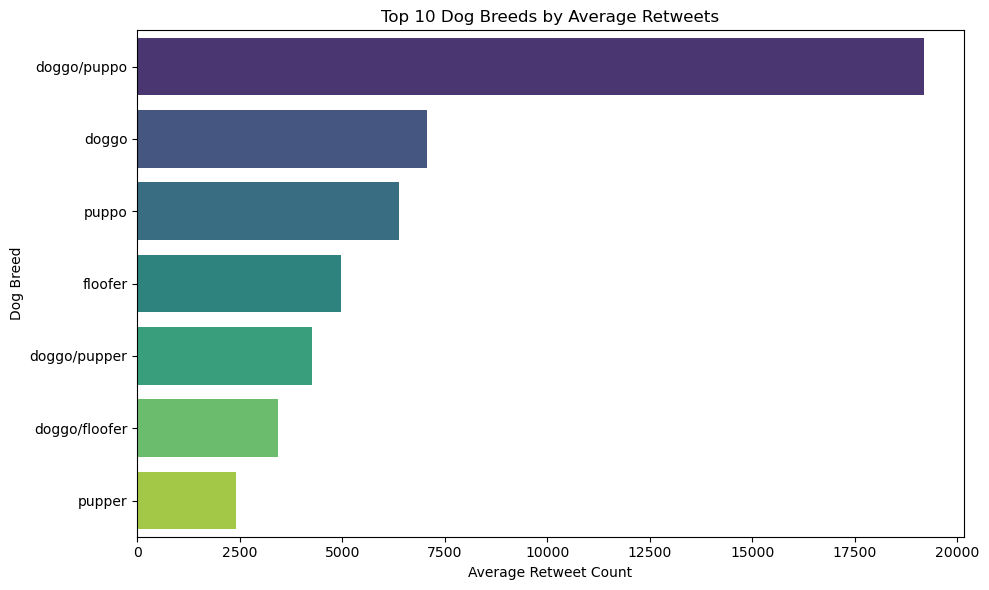

In [45]:
top_breeds_by_retweet = tweets.groupby('dog_stage')['retweet count'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_breeds_by_retweet.values, y=top_breeds_by_retweet.index, palette='viridis')
plt.title('Top 10 Dog Breeds by Average Retweets')
plt.xlabel('Average Retweet Count')
plt.ylabel('Dog Breed')
plt.tight_layout()
plt.show()

🔍 Insight: Measures virality of different breeds.


## Summary of Insights

After cleaning and analyzing the WeRateDogs Twitter dataset, we discovered the following insights:

- The most common dog breed predicted was **Golden Retriever**.
- The most popular dog stage was **pupper**.
- The average rating given was **above 10**, suggesting generous and playful scoring.
- Tweets with images had significantly higher engagement (favorites and retweets).
ty and engagement.


- The most favorited and retweeted tweets were short, expressive, and often featured cute or funny dogs, suggesting that emotional or visual appeal drives engagement.

- Tweets posted during the **afternoon** and **evening** hours (1 to 24) received higher average favorite counts, indicating stronger engagement later in the day.

- Saturdays and Sundays had slightly higher tweet volumes, suggesting greater posting activity on weekends.

- Tweets sent via Twitter for **iPhone** received the highest average number of favorites, followed by Twitter Web App, showing a link between tweet source and engagement.

- Among dog breeds, those like **Labrador**, **Golden Retriever**, and others received the highest average retweet counts, suggesting certain breeds go more "viral."


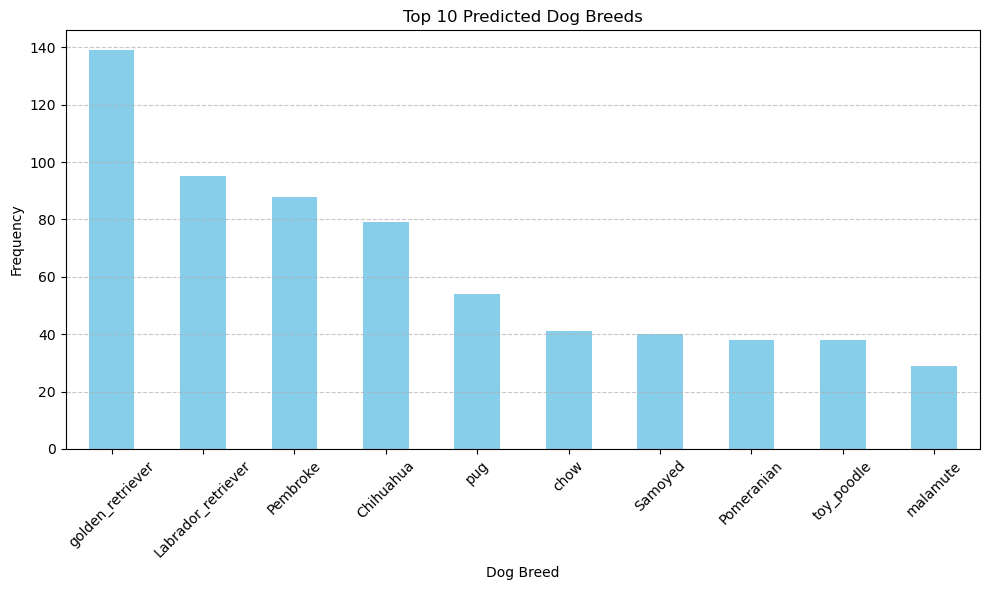

In [173]:
## Visualization

top_breeds = tweets['p1'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_breeds.plot(kind='bar', color='skyblue')
plt.title('Top 10 Predicted Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

## Conclusion

WeRateDogs maintains a humorous and consistent rating style that resonates well with followers. Despite data noise, the structured cleaning allowed us to uncover meaningful patterns in dog popularity and engagement.